In [32]:
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d  # for 3d plots

# Fit data with function $y = f(x)$ by minimizing sum or squared errors.

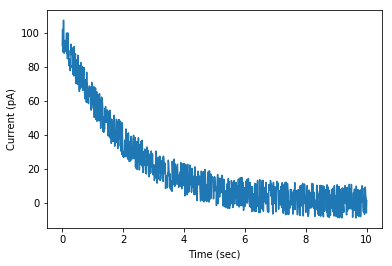

In [60]:
time_sec = np.linspace(0, 10, 1000)
current_pA = 100 * np.exp(-time_sec / 2) + 20 * (np.random.rand(len(time_sec)) - 0.5)

plt.plot(time_sec, current_pA)
plt.xlabel('Time (sec)')
plt.ylabel('Current (pA)');

In [62]:
def exponential_decay(time, amp, tau):
    return amp * np.exp(-time / tau)

result = opt.curve_fit(exponential_decay, time_sec, current_pA)

print(result)

(array([99.48184967,  2.00113747]), array([[ 6.95594731e-01, -1.40240711e-02],
       [-1.40240711e-02,  5.67295333e-04]]))


In [63]:
amp, tau = result[0]

print(amp, tau)

99.4818496715962 2.001137467150377


In [66]:
result = opt.curve_fit(exponential_decay, time_sec, current_pA, p0=[90, 4], bounds=([80, 1], [120, 10]))

amp, tau = result[0]

print(amp, tau)

99.48184939004561 2.001137478294778


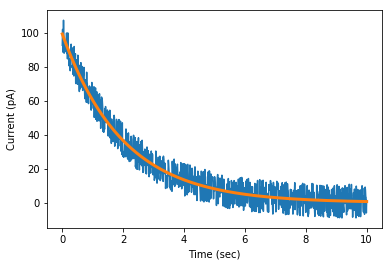

In [67]:
plt.plot(time_sec, current_pA)
plt.plot(time_sec, exponential_decay(time_sec, amp, tau), lw=3)
plt.xlabel('Time (sec)')
plt.ylabel('Current (pA)');

# Find optimal parameters that minimize an objective (or cost) function.

### Find $x$ that minimizes $(|x| - 5)^2 + x$

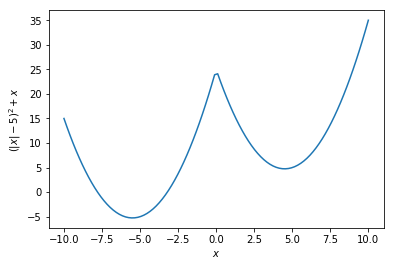

In [80]:
# cost function to be minimized
def cost_func(x):
    return (abs(x) - 5)**2 + x

# plot cost function
x = np.linspace(-10, 10, 100)
plt.plot(x, cost_func(x))
plt.xlabel('$x$')
plt.ylabel('$(|x| - 5)^2 + x$');

In [81]:
x0 = [-10]  # initial guess

# find value of x that minimizes cost function
result = opt.minimize(cost_func, x0)

print(result)
print()
print(result.x)

      fun: -5.25
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([-5.50000002])

[-5.50000002]


In [82]:
x0 = [10]
result = opt.minimize(cost_func, x0)
print(result)

      fun: 4.750000000000001
 hess_inv: array([[0.5]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4.50000003])


In [83]:
x0 = [10]
result = opt.minimize(cost_func, x0, method='slsqp')
print(result)

     fun: -5.25
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([-5.5])


In [84]:
x0 = [-10]  # initial guess
bnds = opt.Bounds([0], [10])  # lower bounds, upper bounds
result = opt.minimize(cost_func, x0, method='slsqp', bounds=bnds)
print(result)

     fun: 4.75
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([4.5])


### Find $x$ and $y$ that minimizes $10 (x - 5)^2 + 9 (y + 3)^2$

In [85]:
params = [1, 3]
x, y = params
print(x, y)

1 3


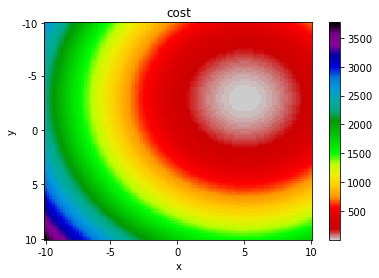

In [33]:
# cost function to be minimized
def cost_func(params):
    x, y = params
    return 10 * (x - 5)**2 + 9 * (y + 3)**2

# plot cost function
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

cost = np.zeros((len(y), len(x)))
for row in range(len(y)):
    for col in range(len(x)):
        cost[row, col] = cost_func([x[col], y[row]])

plt.imshow(cost, aspect='auto', cmap=plt.cm.nipy_spectral_r)
plt.xticks([0, 24, 49, 74, 99], [-10, -5, 0, 5, 10])
plt.yticks([0, 24, 49, 74, 99], [-10, -5, 0, 5, 10])
plt.xlabel('x')
plt.ylabel('y');
plt.title('cost')
plt.colorbar();

In [34]:
x0 = -10
y0 = 10
guess = [x0, y0]  # initial guess
bnds = opt.Bounds([-10, -10], [10, 10])  # lower bounds, upper bounds
result = opt.minimize(cost_func, guess, method='slsqp', bounds=bnds)
print(result)

     fun: 7.099748146989106e-30
     jac: array([1.49011612e-07, 1.34110467e-07])
 message: 'Optimization terminated successfully.'
    nfev: 18
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([ 5., -3.])


### Find $x$ and $y$ that minimizes $10 (x - 5)^2 + 9 (y + 3)^2$ under the constraint $x = y$

You will need to cast all constraints in one of these two forms:

1. equality_constraint(params) = 0
2. inequality_constraint(params) >= 0

In [35]:
def constraint_that_x_equals_y(params):
    x, y = params
    return x - y

con_eq = {'type': 'eq', 'fun': constraint_that_x_equals_y}

guess = [-10, 10]  # initial guess
bnds = opt.Bounds([-10, -10], [10, 10])  # lower bounds, upper bounds
result = opt.minimize(cost_func, guess, method='slsqp', bounds=bnds, constraints=con_eq)
print(result)

     fun: 303.15789473684254
     jac: array([-75.78947449,  75.78947449])
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.21052632, 1.21052632])


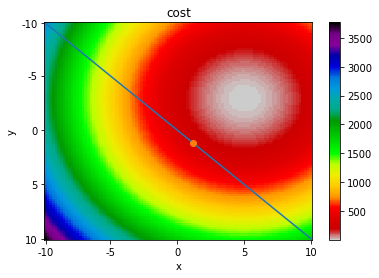

In [9]:
plt.imshow(cost, aspect='auto', cmap=plt.cm.nipy_spectral_r)
plt.xticks([0, 24, 49, 74, 99], [-10, -5, 0, 5, 10])
plt.yticks([0, 24, 49, 74, 99], [-10, -5, 0, 5, 10])
plt.xlabel('x')
plt.ylabel('y');
plt.title('cost')
plt.colorbar();

plt.plot([0, 99], [0, 99])

x1, y1 = result.x  # optimal values
col = np.argmin(np.abs(x - x1))
row = np.argmin(np.abs(y - y1))
plt.plot(col, row, 'o');

### Find $x$ and $y$ that minimizes $10 (x - 5)^2 + 9 (y + 3)^2$ under the constraint $x <= y + 2$

In [36]:
def constraint_that_x_less_than_or_equal_to_y(params):
    x, y = params
    return y + 2 - x

con_ineq = {'type': 'ineq', 'fun': constraint_that_x_less_than_or_equal_to_y}

guess = [-10, 10]  # initial guess
bnds = opt.Bounds([-10, -10], [10, 10])  # lower bounds, upper bounds
result = opt.minimize(cost_func, guess, method='slsqp', bounds=bnds, constraints=con_ineq)
print(result)

     fun: 170.52631608492828
     jac: array([-56.84210396,  56.84210777])
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([2.15789473, 0.15789474])


### You place a mouse in a chamber with two paths, one of which leads to a reward and one that doesn't, and observe whether it chooses the path to the reward. You repeat the experiment 10 times per mouse for 100 mice (randomizing where the reward is each time). Based on your data (see below), what is the maximum likelihood probability that a mouse will select the path to the reward? What is the 95% confidence interval for your estimate?

In [38]:
num_rewards_out_of_10 = np.array([ 6,  5,  7,  4,  8,  4,  8,  6,  3,  4,  6, 10,  7,  7,  7,  7,  7,
        9,  7,  7,  5,  6,  8,  8,  8,  5,  8,  4,  6,  6,  7,  6,  8,  9,
        5,  4,  5,  8,  8,  6,  9,  8,  7,  4,  8,  7,  9,  9,  6,  8,  7,
        4,  6,  8,  8,  8,  6,  8,  8,  6,  6,  6,  7,  8,  9,  7,  9,  9,
        9,  7,  6,  5,  5,  9,  6,  9,  7,  7,  4,  9,  8,  9,  8,  6,  4,
        8,  8,  8,  8,  8,  6,  8,  6,  8,  6,  8,  5,  9,  9,  5], dtype=int)

In [39]:
def binomNegLoglikelihood(k, n, p):
    return -st.binom.logpmf(k, n, p).sum()

def dataNegLoglikelihood(p):
    return binomNegLoglikelihood(num_rewards_out_of_10, 10, p)

p = opt.minimize_scalar(dataNegLoglikelihood, bounds=(0, 1), method='bounded')

print(p)

     fun: 185.35990688250916
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: 0.6919994832901961


### You record the number of times each of 50 neurons spike within 1 minute after application of a novel compound. What is the maximum likelihood estimate of these neuron's spike rate in response to the compound? What is the 95% confidence interval for your estimate?

In [29]:
observed_num_spikes_in_a_minute_for_all_neurons = np.array([32, 35, 32, 37, 32, 26, 30, 35, 33, 37, 34, 31, 28, 29, 33, 29, 30,
       25, 32, 29, 34, 41, 33, 29, 30, 18, 30, 29, 30, 42, 22, 30, 21, 38,
       36, 33, 33, 38, 32, 39, 32, 38, 36, 42, 25, 29, 23, 28, 43, 49], dtype=int)

In [31]:
def poissonNegLoglikelihood(k, mu):
    return -st.poisson.logpmf(k, mu).sum()

def dataNegLoglikelihood(mu):
    return poissonNegLoglikelihood(observed_num_spikes_in_a_minute_for_all_neurons, mu)

lb = observed_num_spikes_in_a_minute_for_all_neurons.min()
ub = observed_num_spikes_in_a_minute_for_all_neurons.max()

p = opt.minimize_scalar(dataNegLoglikelihood, bounds=(lb, ub), method='bounded')

print(p)
print()
print("MLE of spike rate in reponse to compound is", p.x, "spikes per minute")

     fun: 159.0424199807436
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 32.24000003909161

MLE of spike rate in reponse to compound is 32.24000003909161 spikes per minute


### Repeat above for mice in chamber with reward and non-reward paths. However, this time you lost your records for how many times you tested each mouse! Get a maximum likelihood estimate for both the probability that a mouse selects the reward path and the number of times each mouse was placed in the chamber and 95% confidence intervals for each estimate.

In [40]:
num_rewards_out_of_who_knows = num_rewards_out_of_10

def binomNegLoglikelihood(k, n, p):
    return -st.binom.logpmf(k, n, p).sum()

def dataNegLoglikelihood(params):
    n, p = params
    return binomNegLoglikelihood(num_rewards_out_of_who_knows, n, p)

n0 = 20
p0 = 0.25
guess = [n0, p0]  # initial guess
bnds = opt.Bounds([0, 0], [20, 1])  # lower bounds, upper bounds
result = opt.minimize(dataNegLoglikelihood, guess, method='slsqp', bounds=bnds)
print(result)

     fun: 185.35788124403302
     jac: array([0.00114059, 0.00430298])
 message: 'Optimization terminated successfully.'
    nfev: 89
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([10.03934948,  0.6892886 ])


In [34]:
n, p = result.x

print("MLE probability of choosing reward path is", p, "on each of", int(n), "attempts")

MLE probability of choosing reward path is 0.6919995498245606 on each of 10 attempts


# Example exercises

### 1. Fit the following data to a theoretical function.

In [73]:
time_sec = np.linspace(0, 1, 100)
voltage_mV = np.array([-19.33535068, -19.81593   , -19.38068935, -19.01444258,
       -19.01279965, -18.08972043, -19.05443624, -16.92871871,
       -17.41921874, -17.13110999, -16.23081011, -15.93055289,
       -16.6963649 , -16.02562308, -16.08446757, -15.70107301,
       -16.14943005, -16.24260514, -16.2479143 , -15.26316983,
       -14.14899883, -14.2671532 , -13.85340797, -15.38637959,
       -13.62949667, -14.09838187, -14.5240729 , -14.52185707,
       -13.02644386, -12.98712829, -14.37612648, -14.06115682,
       -13.58528874, -13.74801745, -13.31550763, -13.82579987,
       -13.37824516, -13.02067885, -12.20748865, -13.12844023,
       -12.80277207, -12.85018719, -12.76829176, -12.65668693,
       -11.97756266, -11.46451702, -11.67070899, -12.32710194,
       -12.93915408, -12.80260755, -11.62231014, -12.64038186,
       -11.91782401, -10.87750533, -11.82992523, -11.67502684,
       -11.82323243, -10.76213803, -12.05737906, -11.3578388 ,
       -10.44744459, -11.76906988, -11.36599376, -12.1965993 ,
       -10.16171931, -11.60630276, -12.0049248 , -11.61201511,
       -10.11810532, -10.02273279, -10.38912268, -11.72630602,
       -10.08001563, -10.58014772, -10.03496926, -11.50078207,
       -10.01827333, -11.1164367 , -10.86874543, -10.15982785,
        -9.72053465, -10.04952839, -10.31409222, -11.28338912,
       -10.65026096, -11.20603978,  -9.6280181 ,  -9.73437495,
       -10.38121048,  -9.64101998, -11.08428724,  -9.69146819,
        -9.6996263 ,  -9.6253655 , -10.97046052, -11.28989399,
        -9.63686909,  -9.87094353, -10.55579744,  -9.6242286 ])

10.016434564629817 0.3443582278242249 -19.576822140077315


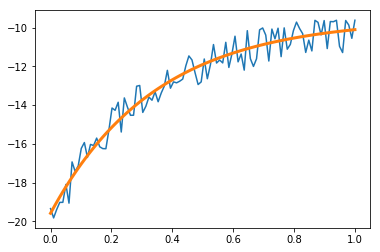

In [79]:
plt.plot(time_sec, voltage_mV);

def exp_rise(t, amp, tau, constant):
    return amp * (1 - np.exp(-t / tau)) + constant

result = opt.curve_fit(exp_rise, time_sec, voltage_mV, p0=[10, 0.2, -20], bounds=([1, 0.01, -100], [40, 10, 100]))

amp, tau, constant = result[0]

print(amp, tau, constant)

plt.plot(time_sec, exp_rise(time_sec, amp, tau, constant), lw=3)

### 2. Using electron microscopy you count the number of docked vesicles per synapse. What is the maximum likelihood estimate for the average number of docked vesicles per synapse given you data below? Also provide 95% confidence limits on this estimate.

In [42]:
# each entry is # of docked vesicles at a particular synapse
num_docked_vesicles = np.array([ 8,  3,  7,  7,  5,  5,  3,  7,  7,  7,  6,  3,  7,  5,  3,  8,  5,
        8,  5,  5,  3,  3,  6,  7,  8, 13,  7,  7,  7,  5,  4,  9, 13,  3,
        5,  7,  6,  5,  4,  4,  3,  5, 13,  7,  8,  5,  4,  9,  4,  8,  3,
        5,  3,  5,  3,  5,  6,  7,  7,  6,  8,  8,  7,  5,  9,  3, 11,  9,
        8,  5,  2,  9,  8,  8,  2,  8,  8,  5,  8,  4,  6,  8,  5,  6,  3,
        3,  7,  7,  2,  4,  6,  7,  7,  4,  4,  2,  7,  3,  9,  7,  7,  4,
        5,  9,  6,  6,  5,  2,  7,  6,  4,  6,  4,  7,  7,  8,  8,  8,  5,
        7,  5,  6,  4,  2,  7,  8,  4,  2,  6,  3,  5,  5,  5,  8,  7,  2,
        4,  8,  9, 10,  5,  6,  5,  5,  5,  4,  3,  2,  3,  5,  7,  2,  5,
        7,  5, 10,  8,  5,  3,  4,  6,  7,  8,  3,  5,  7,  9,  7,  4,  6,
        3,  6,  7,  5,  9,  4,  5, 13,  9, 10,  6,  7,  6,  5,  9,  8,  8,
        3,  5,  3,  7,  6,  8,  6,  3,  5,  8,  6,  6,  3], dtype=int)

In [43]:
def poissonNegLoglikelihood(k, mu):
    return -st.poisson.logpmf(k, mu).sum()

def cost_function(mu):
    return poissonNegLoglikelihood(num_docked_vesicles, mu)

p = opt.minimize_scalar(cost_function, bounds=(0, 100), method='bounded')

print(p)

     fun: 443.9296609072842
 message: 'Solution found.'
    nfev: 14
  status: 0
 success: True
       x: 5.895000639813552


### 3. You record the time-dependent current through a single ion channel at +50 mV in symmetrical ionic solutions (time series data is below). Based on the data, determine the channel's conductance states and their 95% confidence intervals.

In [44]:
# Single channel current record (pA). Sample interval is 100 microseconds.
current_pA = np.array([ 0.00000000e+00, -2.35394235e-01,  6.07833286e-01, -8.70306907e-01,
       -1.25841170e+00, -1.74297695e-02, -5.58284641e-01,  2.78609759e+00,
        4.78248770e+00,  4.69373968e+00,  5.67881976e+00,  4.99705998e+00,
        6.30184317e+00,  4.83487181e+00,  3.03183825e+00,  5.83206241e+00,
        5.35819319e+00, -4.60627502e-01,  1.07486132e+00,  2.91376156e+00,
        2.10070182e+00,  1.18350752e+00,  1.91661039e+00,  2.27939756e+00,
        1.29232847e+00,  1.48268820e+00,  4.61369862e+00,  5.00355371e+00,
       -1.44819161e+00, -5.51972368e-01,  2.98400128e-01,  7.46190742e-01,
       -6.42705287e-01,  4.58047840e-01, -7.41532194e-01, -6.73262703e-01,
        5.91905023e-01,  2.41612119e-01,  2.99097843e+00,  1.68857562e+00,
        2.54164978e+00,  2.73297315e+00,  2.44545466e+00,  1.17925091e+00,
        2.75972609e+00,  1.37661225e+00,  1.98199173e+00,  1.76662384e+00,
        2.51339495e+00,  1.97739440e+00,  2.52634436e+00,  8.51353231e-01,
       -5.73178723e-01,  1.63084881e+00,  3.21066731e+00,  6.50098026e+00,
        3.82993941e+00, -3.40622218e-01, -6.44956162e-01, -5.14403137e-01,
       -2.07115509e-01, -9.05523326e-01,  3.59862599e-01,  1.35010587e-01,
       -4.15770501e-03, -2.82345061e-01,  2.81339139e-01, -2.87053959e-01,
        2.39041366e+00,  4.35900735e-01,  1.66756888e+00,  1.91837972e+00,
        1.11969643e+00,  1.31477977e+00,  1.45233161e+00,  1.70625427e+00,
        2.18176920e+00,  2.23218499e+00,  1.66333979e+00,  1.74158175e+00,
        3.86019668e+00,  1.50568450e+00,  1.25141608e+00,  2.20152044e+00,
        4.69589336e+00,  4.25880606e+00,  4.61861707e+00, -5.94591437e-01,
       -3.65028789e-01,  3.23722523e-01,  6.19410844e+00,  5.58166939e+00,
        3.85071042e+00,  4.40009238e+00,  8.12198881e-01,  4.42617977e-01,
        5.95656399e-01, -1.10237496e+00, -8.98242376e-01,  7.94843118e-02,
        5.02012149e+00,  5.47512233e+00,  5.25582988e+00,  5.49404794e+00,
        4.28887172e+00,  4.61565686e+00,  3.83608122e+00,  2.35337233e+00,
        3.67022237e+00, -1.11334635e+00, -3.18741077e-01, -3.99539006e-01,
        8.52420828e-02, -3.93682375e-01, -2.68777379e-02, -5.10853746e-02,
       -1.15787989e-01, -3.52036704e-01, -5.32425938e-01, -1.24672576e+00,
        3.78593323e-01,  1.15892914e+00, -5.83994444e-01,  2.78768157e-01,
        1.39543987e-01, -5.79143158e-01,  3.39523161e+00,  5.22938269e+00,
        5.12957734e+00,  5.99947723e+00,  3.47899706e+00,  4.54859360e+00,
        4.43192113e+00,  6.18596821e+00,  4.80092205e+00,  3.84851588e+00,
        5.52286481e+00,  4.22197068e+00,  5.25556506e+00,  3.39726765e+00,
        3.95806880e+00,  5.19732271e-02,  3.82649645e-01, -2.81867318e-01,
        1.54658894e-01,  7.41042105e-01,  1.19612111e-01,  3.08308106e-01,
        1.30592584e-01, -4.90093303e-01,  1.76953535e-02,  3.70764975e-01,
        6.93714048e-01,  1.34719391e-03, -1.32212088e-01, -5.78001048e-01,
        1.75952612e-01, -3.85325860e-01,  2.97573118e+00,  4.78669205e+00,
        4.61278529e+00,  2.76800451e+00,  4.16105050e+00,  5.33284168e+00,
       -6.91454966e-01,  7.44278510e-01, -1.78087687e-01, -1.07690707e-02,
       -5.15949200e-01, -2.12352159e-02,  1.43678730e-02,  4.10445502e-01,
        1.02651487e-01, -6.21051441e-02,  9.73525935e-02,  3.51205459e-01,
       -1.53660529e-01, -4.67862784e-01,  4.76170250e-01,  1.48609704e-01,
        6.97893890e-01,  5.81011874e+00,  1.17941897e+00, -3.81008936e-01,
        1.12724230e+00, -6.24757237e-01,  7.51028577e-01,  2.66629092e-01,
        5.50412454e+00,  4.19133725e+00,  4.09773610e+00,  4.91765871e+00,
        4.48516386e+00,  3.42712419e+00,  5.04727020e+00,  5.76303846e+00,
        5.64527893e+00,  5.31863192e+00,  6.84720646e+00,  5.10201998e+00,
        6.13293645e+00,  5.17184085e+00,  3.28588438e+00,  6.21459053e+00,
        8.86636021e-01,  4.30073067e-01, -1.82835345e-01,  6.23432272e+00,
        4.89739508e+00,  4.95640821e+00,  5.86488527e+00,  4.76614324e+00,
        5.56635125e+00,  5.58515436e+00,  5.32609459e+00,  4.44922633e+00,
        4.68761265e+00,  5.72018314e+00,  4.53798775e+00,  5.35117506e+00,
        6.55592233e+00,  7.31036662e-01,  1.00165977e-02,  1.00127817e+00,
       -5.12566393e-01,  6.64430341e-02,  4.94824937e-02, -2.52122454e-01,
       -1.66718603e-03,  4.01108487e+00,  5.38854432e+00,  4.40596752e+00,
        4.31745088e+00,  4.09093292e+00,  5.49939608e+00,  4.38892305e+00,
        7.06768792e+00,  4.83096902e+00,  4.67238235e+00,  4.64054073e+00,
        5.97315744e+00,  3.64447394e+00,  6.52360451e+00,  1.67080047e-01,
        1.58743815e-01, -4.97994325e-01,  2.77442586e-01,  8.40816780e-01,
       -2.76123328e-01,  2.96957222e-01,  8.67329185e-01, -2.15183359e-01,
        1.97688390e+00,  2.50587484e+00,  5.33830774e+00,  6.35012627e+00,
        4.72571451e+00,  4.12477664e+00,  4.98959977e+00,  4.99791463e+00,
        4.31788380e+00,  4.82419428e+00,  6.24065982e+00,  4.71929306e+00,
        6.47166049e+00,  4.64263725e+00,  4.25388140e+00,  4.97108273e+00,
        5.36356874e+00,  6.09683618e+00,  4.70881307e+00,  3.90790662e+00,
        4.60344649e+00,  2.96657248e+00,  4.91172918e+00,  4.86004171e+00,
       -1.03664236e-01, -1.28981910e+00,  5.65662422e+00,  4.84480518e+00,
        4.63513934e+00,  3.88702111e+00,  5.40899961e+00,  6.58228256e+00,
        4.22522761e+00,  4.98799388e+00,  3.82113599e+00,  5.34481406e+00,
        3.48372344e+00,  2.76332305e+00,  5.07734330e+00,  4.19223767e+00,
        5.44372783e+00,  5.74934559e+00,  4.93328862e+00,  6.47041815e+00,
        4.80420346e+00,  4.76978276e+00,  5.05511742e+00,  4.95050316e+00,
        3.94901753e+00,  3.92472554e+00,  4.31938430e+00,  4.65210990e+00,
        6.15180663e+00,  5.07877829e+00,  6.56012409e+00,  4.20723605e+00,
        3.81550402e+00,  4.47061072e+00, -5.69054016e-01, -7.84616662e-01,
       -1.98468796e-01,  5.38468108e-01,  5.73989511e-01,  1.50372009e-02,
        1.96245180e-01, -7.09689441e-01,  7.76448894e-01,  5.03919904e-01,
       -1.69266354e-01, -7.83270455e-01, -8.94048883e-01, -1.17435501e+00,
       -6.64616930e-01,  3.99032164e-01,  7.07776055e-01, -5.98138336e-01,
        2.16213375e-01,  3.04162160e-01, -1.24266851e+00, -1.42416970e-01,
        6.19975070e-01,  4.84911325e-01,  1.95967750e-01, -6.37770775e-01,
       -5.83109741e-01, -9.62725747e-01, -5.18823095e-01, -5.76940857e-01,
        4.62372911e-01,  8.69445149e-01,  5.12538010e-01,  3.17208541e-01,
        4.72208582e-01,  2.27873851e+00,  2.57947901e+00,  2.55378886e+00,
       -6.21728442e-01, -8.04110171e-01,  6.13548342e-01, -2.34156894e-01,
        5.60106130e+00,  4.58944257e+00,  4.52930781e+00,  6.89404816e+00,
        5.18856013e+00,  3.70978746e+00,  5.64345571e+00,  4.17924589e+00,
        5.97330067e+00,  1.53794649e-01,  2.05903817e-01,  1.61260938e-01,
       -3.25067734e-01,  1.50956982e-01,  4.09703821e-01, -2.67476991e-01,
        5.50912650e+00, -3.84203946e-01, -1.09823328e-01, -9.11846052e-03,
       -6.60663999e-02,  8.09315308e-01,  5.69463865e-01, -4.69163402e-01,
       -1.25743717e-01,  3.17528871e-01, -8.31831349e-01,  5.14788905e-01,
       -4.50043642e-01, -2.09737709e-01, -5.43059326e-02, -5.14679082e-01,
       -1.84233722e-01,  2.92250622e+00,  6.04219983e+00,  5.89374422e+00,
        5.08316147e+00,  5.28852812e+00,  4.55730956e+00,  3.40790975e+00,
        4.26451066e+00,  4.39505582e+00,  3.01505874e+00,  5.22432918e+00,
        4.12567297e+00,  3.85602698e+00,  5.32965183e+00,  4.14539342e+00,
        3.68378241e+00,  4.47342468e+00,  5.05517480e+00,  6.59834411e+00,
        5.55650193e+00,  6.91460435e+00,  4.21584833e+00,  6.02797597e+00,
        6.21484966e+00,  5.78263423e+00,  6.02205711e+00,  4.73538849e+00,
        6.78430844e+00,  5.31165875e+00,  4.16615106e+00,  6.24564358e+00,
        6.12474151e+00,  4.78900502e+00,  5.87334550e+00,  6.09462959e+00,
        5.44633275e+00,  5.04946494e+00,  3.55625112e+00,  1.97616094e+00,
        1.27371899e+00,  5.15156729e-02,  6.96208827e-01,  6.69849259e-01,
        4.45580988e+00,  4.02572944e+00,  2.17927668e+00,  6.55604770e+00,
        3.33227557e+00,  4.82226224e+00,  4.89847403e+00,  2.84086030e+00,
       -5.86029968e-01,  2.36353907e-01,  2.39716393e-01, -7.07255090e-01,
       -2.81219915e-01,  2.51116339e-01, -1.26565191e-01,  3.62540753e+00,
        3.32995387e+00,  5.66744265e-01, -3.40645496e-02, -5.84484719e-01,
        5.78613493e-02,  3.23157318e-01,  9.60771854e-02, -4.16136912e-01,
       -7.04181139e-02,  4.23666253e-01, -5.74010844e-01, -1.71738551e-01,
       -2.42243438e-01,  2.18816668e-01,  3.07139554e-01,  3.49351347e-01,
        8.56725469e-01,  1.23632321e+00,  1.88519013e-01, -2.98144414e-01,
        4.98438837e-02,  1.14320966e+00, -1.09747355e-01,  3.19141747e+00,
        1.67241140e+00,  3.66922162e+00,  1.46583340e+00,  2.85149140e+00,
        2.74238434e+00,  2.32424380e+00,  2.86499143e+00,  2.38703208e+00,
        2.05881964e+00,  1.75789261e+00,  1.77086193e+00,  1.70326953e+00,
        2.52617867e+00,  2.07655081e+00,  1.07607905e+00,  2.43453813e+00,
        2.26353454e+00,  1.90824367e+00,  1.01588795e+00,  1.93368475e+00,
        1.99684441e+00,  5.11396615e+00, -4.58835008e-01,  8.90157108e-01,
        3.88577889e-01,  1.80190657e+00,  9.10633663e-01,  2.89357535e+00,
        5.66504206e+00,  5.49020086e+00,  3.08693614e+00,  4.67819246e+00,
        5.19606891e+00,  4.82684580e+00,  3.88366081e+00,  4.49152794e+00,
        4.34359416e+00,  4.35466445e+00,  3.30521825e+00,  6.25648225e+00,
        5.02653493e+00, -5.70298789e-02,  1.19753305e+00,  3.42595810e-01,
        1.67493637e+00,  2.26428932e+00,  1.47106154e+00,  1.50521973e+00,
        2.09963688e+00,  1.95238363e+00,  1.71197507e+00,  2.18808090e+00,
        3.20780417e+00,  1.65151195e+00,  1.61326552e+00,  3.09809517e+00,
        1.88794987e+00,  2.18740681e+00,  7.74253556e-01,  2.77897882e+00,
        1.72264326e+00,  2.41937107e+00,  1.44320491e+00,  5.17589501e-01,
        2.00088254e+00,  2.41455666e+00,  2.51899870e+00,  1.64813695e+00,
        4.68627910e+00,  5.67713834e+00,  3.52135890e+00,  4.89507513e+00,
        7.18450996e+00,  4.11871362e+00,  5.17891649e+00,  6.31167964e+00,
        5.46112205e+00,  4.03201460e+00,  3.92611121e+00,  5.84590943e+00,
        5.36973422e+00,  5.59472581e+00,  4.28178480e+00,  4.37445322e+00,
        5.05222825e+00,  5.52243570e+00,  3.23795458e+00,  5.16305168e+00,
        5.26622084e+00,  6.01434228e+00,  4.12277624e+00,  6.21006910e+00,
        6.24229037e+00,  4.23761650e+00,  5.09941210e+00,  5.35582130e+00,
        4.09610898e+00,  5.42990944e+00,  4.46057780e+00,  5.57508105e+00,
        5.01842699e+00,  5.01288934e+00, -1.52280443e+00, -2.33384021e-02,
       -6.34707019e-02, -1.00099157e+00,  2.68210925e-01,  4.22525634e+00,
        5.33389294e+00,  3.42543670e+00,  5.47599883e+00,  3.93018892e+00,
        5.06096559e+00,  5.11148086e+00,  5.71579167e+00,  6.34809632e+00,
        6.11894498e+00,  4.82520063e+00,  5.33995915e+00,  4.76015774e+00,
        5.74386634e+00,  4.74162452e+00,  5.14921295e+00,  2.42957509e+00,
        5.22449423e+00,  4.61466962e+00,  3.45230630e+00,  4.42505258e+00,
        5.23595054e+00,  3.13562129e+00,  3.38412124e+00,  5.54940694e+00,
        5.24741588e+00,  5.20281489e+00,  5.78871816e+00,  4.73847482e+00,
        5.15666998e+00,  5.68131499e+00,  4.55421657e+00,  6.45650213e+00,
        6.32737988e+00,  4.53161324e+00,  4.03978912e+00,  5.69315915e+00,
        5.10470017e+00,  4.50330832e+00,  4.57634074e+00,  4.98727683e+00,
        5.10453786e+00,  4.60708248e+00,  2.53164025e-01, -4.43106675e-01,
        2.65099292e+00,  6.55287395e+00,  5.51439659e+00,  5.16165839e+00,
        3.58207227e+00,  1.00171123e+00, -1.34743915e-01,  1.07353283e+00,
        9.43654937e-01,  3.75702439e+00,  4.80809556e+00,  5.44679085e+00,
        3.54428702e-02,  4.57189642e-01, -6.22028786e-03,  4.92928767e-01,
        3.09224777e-01,  3.89566279e-01,  3.19268180e-01,  3.54326036e-01,
       -9.72095846e-01, -6.78172273e-01, -1.68570029e-01, -3.36378664e-01,
       -4.51651633e-01, -6.34563358e-01, -3.33411742e-01,  4.06929719e-01,
       -2.63869480e-01, -2.27360242e-01, -5.50530063e-01, -8.00015938e-02,
       -5.05033354e-01,  2.56639866e-01, -6.71518215e-02, -5.53206933e-01,
       -5.25135475e-01, -2.53552619e-01, -1.06549885e+00, -4.94171583e-01,
        3.42475039e-01,  8.41688979e-01,  3.32803148e-01, -5.20871100e-01,
        5.87397550e-02,  1.96749995e+00,  2.29304688e+00,  2.29672192e+00,
        7.35592817e-02,  1.75138038e+00,  1.75796971e+00,  2.69261781e+00,
        3.44781270e+00,  1.71453366e+00,  2.29723326e+00,  1.60633201e+00,
        3.06150336e+00,  1.32374036e+00,  1.94679548e+00,  1.22769026e+00,
        5.42947746e+00,  5.89559369e+00,  5.63004935e+00,  5.05891805e+00,
        5.28104571e+00,  2.72631153e+00,  5.49943719e+00,  4.67899259e+00,
        6.20384231e+00,  5.01494446e+00,  4.22665514e+00,  4.81657598e+00,
        2.38426134e+00,  5.38265912e+00,  6.42894192e+00,  3.06540277e+00,
        5.92706574e+00,  6.67872976e-01,  2.78216391e+00,  8.03945493e-01,
        2.72272307e+00,  2.52631306e+00,  1.86918398e+00,  2.46094378e+00,
        2.88882336e+00,  2.22845569e+00,  1.71159936e+00,  1.27204212e+00,
        3.00080403e+00,  1.63441038e+00,  1.89847505e+00,  2.92439964e+00,
        2.28317064e+00,  2.30928990e+00,  1.56514084e+00,  1.80904833e+00,
        4.15168874e+00,  4.41225582e+00,  5.36599510e+00,  5.73157588e+00,
        4.52129243e+00,  5.06654091e+00,  4.18619254e+00,  7.13478843e+00,
        1.92832261e+00,  1.39923528e+00,  1.55280253e+00,  2.41123612e+00,
        2.58210760e+00,  1.13366612e+00,  2.98031988e+00,  1.72448109e+00,
        2.16135015e+00,  1.79579051e+00,  2.45928505e+00,  9.65086076e-01,
        3.39874514e+00,  2.53253911e+00,  2.29074849e+00,  8.51206219e-01,
        1.90698624e+00,  2.27474697e+00,  2.36703413e+00,  1.11421027e+00,
        3.06094100e+00,  2.49187196e+00,  2.55557142e+00,  1.73560141e+00,
        1.32353615e+00,  1.20405983e+00,  8.01954351e-01,  3.63372157e+00,
        4.06946668e+00,  5.35883815e+00,  4.53815453e+00,  4.50734149e+00,
        4.42884467e+00,  5.15082273e+00,  5.38048767e+00, -4.83060337e-01,
        5.86324781e-01, -7.07635657e-01, -3.96769767e-02, -1.71928536e-01,
        1.59561715e-01,  5.72425704e-01,  5.03455513e+00,  2.47486072e+00,
        2.86333190e+00,  6.23822818e+00,  3.44193571e+00,  5.86772308e+00,
        5.91485831e+00,  5.63492174e+00,  1.98388811e-02,  1.91886033e-01,
       -2.86882974e-01,  3.39431116e-01, -5.11399980e-01,  7.32068641e-01,
        3.35959486e+00,  4.35632324e+00, -5.98912740e-01,  1.04535587e-01,
        8.27681537e-01, -1.23641570e+00,  2.56551076e+00,  5.59692672e+00,
        5.87656682e+00,  6.04474640e+00,  6.75038499e+00,  3.76111285e+00,
        6.15217880e+00,  5.22876038e+00,  5.38097539e-01,  2.49936229e-01,
        7.66582790e-01,  1.13116318e-01,  4.69509486e-01, -2.40432983e-01,
        3.64384014e-01, -3.93192343e-02, -4.67088178e-01,  2.37359997e+00,
        2.02762815e+00,  5.28426900e+00,  6.49650666e+00,  6.88385717e-01,
       -5.66918501e-01,  7.14217986e-01,  6.34703268e-04,  6.58382771e-01,
       -9.68954276e-01,  3.69113024e-01, -3.42755629e-02,  3.61400383e-01,
        1.68605611e-01,  1.32412039e+00,  4.99299216e+00,  5.85098743e+00,
        4.43981428e+00,  4.34171615e+00,  6.75843133e+00,  5.48285066e+00,
        4.72453113e+00,  6.26784060e+00,  3.79397173e+00,  4.46706639e+00,
       -5.16051490e-01,  1.80721884e+00,  1.27800963e+00,  2.65462601e+00,
        1.73931061e+00,  2.36206879e+00,  1.78028518e+00,  2.64296002e+00,
        2.53924418e+00,  2.68635313e+00,  1.52218848e+00,  1.80082431e+00,
        9.89247193e-01,  1.83857348e+00,  2.56870733e+00,  1.79388177e+00,
        6.43174868e+00,  4.05676529e+00,  5.16035089e+00,  8.10403268e+00,
        6.33395956e+00,  5.36969250e+00,  4.11021517e+00,  5.57863174e+00,
        2.39729125e+00,  4.87265882e+00,  1.53999248e+00,  3.16692176e-01,
       -9.68394495e-02, -5.48466391e-02,  5.03758778e-01, -3.86349026e-01,
        3.90149996e-01, -2.59305907e-01, -2.75176353e-01,  6.07524663e-01,
        1.51878435e-01,  4.89789530e-01, -3.63861950e-02, -3.59848445e-01,
        5.49975461e+00,  5.24749798e+00,  4.51709104e+00,  4.51697794e+00,
        3.26617802e+00,  5.41773177e+00,  5.08079949e+00,  4.47700465e+00,
        5.15032511e+00,  5.44431222e+00,  6.26265551e+00,  5.22118916e-02,
       -7.29572053e-01,  1.80990868e-01,  3.87541970e-01, -2.62406441e-01,
        2.25509443e-01,  2.21612096e-01, -9.27519392e-02,  7.82146116e-01,
        1.26083109e-01, -1.20822439e+00, -6.45699877e-01, -5.98345610e-01,
       -5.80377986e-01,  6.27625432e-03,  3.26924906e-01, -1.16486764e-01,
        1.07788700e-01, -3.23001830e-01,  4.69522684e-01,  1.15845476e+00,
       -5.73753815e-01,  5.94855932e+00,  4.81268300e+00,  3.59854874e+00,
        3.31126973e+00,  2.14634417e+00,  8.76389478e-01,  1.02613886e+00,
        1.82915419e+00,  2.94004634e+00,  3.85671064e+00,  5.27870687e+00,
        7.02120176e+00,  6.31854655e+00,  7.83279294e+00,  8.44696228e-01,
        6.06551408e-01,  2.44036705e+00,  2.14885036e+00,  2.42615539e+00,
        1.24812405e+00,  2.51986227e+00,  1.55529541e+00,  5.88929664e+00,
        5.27394828e+00,  4.31596058e+00,  3.17104408e+00,  5.57176325e+00,
        5.68050660e+00,  3.85081684e+00,  6.14503970e+00,  3.54355996e+00,
        4.97140261e+00,  4.45069669e+00,  4.93222238e+00,  8.95799483e-02,
       -3.77974444e-01,  5.62340607e-01,  1.50443813e-01, -3.38391311e-01,
       -1.16628334e+00, -8.43633004e-01, -5.06260355e-02, -1.57859465e-01,
       -1.38528486e-01, -1.30226510e-01, -5.15944750e-01,  2.69338674e-01,
       -2.11566463e-02, -2.13466381e-02,  8.10999760e-01,  7.15971437e-02,
        6.59688135e+00,  2.64405256e+00,  1.51465420e+00,  2.22868548e+00,
        2.82653800e+00,  1.72987041e+00,  1.92337588e+00,  2.99460875e+00,
        1.64045313e+00,  2.00815223e+00,  8.26479943e-01,  1.26351041e+00,
        2.18910372e+00,  1.07603690e+00,  1.15761229e+00,  2.12761980e+00,
        2.90168507e+00,  2.32714947e+00,  2.99920749e+00,  2.73666409e+00,
        1.52107281e+00,  1.49327412e+00,  2.04311653e+00,  1.46003820e+00,
        2.25981785e+00,  1.87948603e+00,  1.96461422e+00,  2.99696402e+00,
        1.48325323e+00,  1.34831203e+00,  1.75584295e+00,  2.85157391e+00,
        2.38644556e+00,  1.41198351e+00,  2.74144257e+00,  5.08657668e+00,
        4.25039843e+00,  5.30212904e+00,  4.96883289e+00,  5.76473842e+00,
        5.67735333e+00,  5.69871463e+00,  5.94869568e+00,  4.01429796e+00,
        4.95619286e+00,  5.67372506e+00,  5.71424239e+00,  3.73974484e+00])

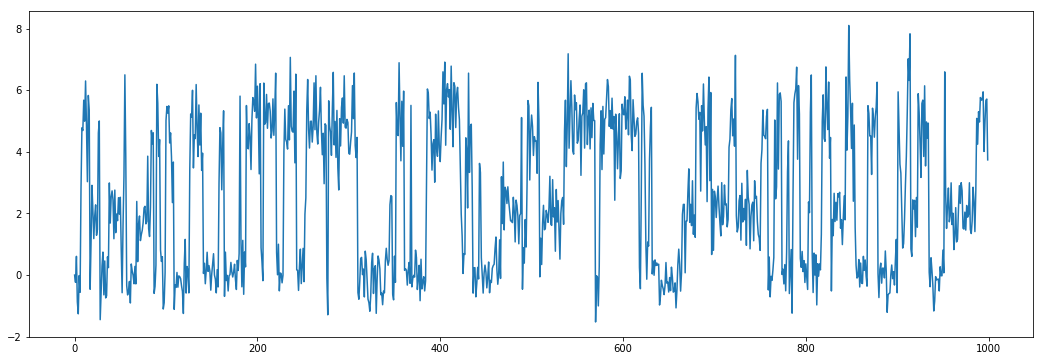

In [46]:
fig = plt.figure(figsize=(18, 6))
plt.plot(current_pA)

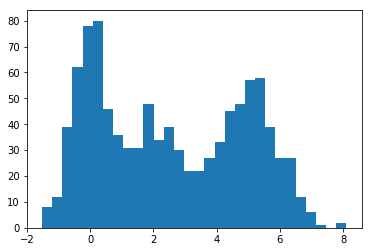

In [49]:
plt.hist(current_pA, 30);